### Car price prediction

* 1) Exploratory Data Analysis

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the data collected through web scraping
df=pd.read_csv("Used cars on Olx data.csv")
df.head()

,Unnamed: 0,Brand,Model,Variant,Year,Kms driven,Fuel,Transmission,Number of owners,Location,Price
0,0,Tata,Tl,Others,2008,30 km,Diesel,Manual,1st,Gujarat,"₹ 80,000"
1,1,Renault,Duster,2012-2015 110PS Diesel-RxZ,2016,"90,000 km",Diesel,Manual,1st,Gujarat,"₹ 4,51,000"
2,2,Tata,Safari,Dicor VX 4X2,2008,"125,600 km",Diesel,Manual,2nd,Gujarat,"₹ 1,70,001"
3,3,Hyundai,i20,2012-2014 Sportz 1.2,2013,"70,330 km",Diesel,Manual,1st,Gujarat,"₹ 3,69,000"
4,4,Mahindra,Bolero,2001-2010 XLS 7 Seater,2013,"90,000 km",Diesel,Automatic,2nd,Gujarat,"₹ 3,50,000"


In [3]:
#drop unnamed column
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [4]:
#view the columns present in dataset
df.columns

Index(['Brand', 'Model', 'Variant', 'Year', 'Kms driven', 'Fuel',
       'Transmission', 'Number of owners', 'Location', 'Price'],
      dtype='object')

In [5]:
#check shape of the data
df.shape

(6069, 10)

In [6]:
#check datatpe of the columns
df.dtypes

Brand               object
Model               object
Variant             object
Year                object
Kms driven          object
Fuel                object
Transmission        object
Number of owners    object
Location            object
Price               object
dtype: object

In [7]:
#check if there are any null values in the dataset
df.isnull().sum()

Brand               0
Model               0
Variant             0
Year                0
Kms driven          0
Fuel                0
Transmission        0
Number of owners    0
Location            0
Price               0
dtype: int64

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             6069 non-null   object
 1   Model             6069 non-null   object
 2   Variant           6069 non-null   object
 3   Year              6069 non-null   object
 4   Kms driven        6069 non-null   object
 5   Fuel              6069 non-null   object
 6   Transmission      6069 non-null   object
 7   Number of owners  6069 non-null   object
 8   Location          6069 non-null   object
 9   Price             6069 non-null   object
dtypes: object(10)
memory usage: 474.3+ KB


#### Observations from the above EDA

* The dataset had 6069 rows and 10 columns
* There are 10 columns namely 'Brand', 'Model', 'Variant', 'Year', 'Kms driven','Fuel','Transmission', 'Number of owners', 'Location'and 'Price'.
* Each column denotes various characteristics of the car to be sold.
* 'Price' is our target variable.
* There are no null values in the dataset
* All the columns in dataset are currently object type which we shall convert later.

#### 2) Data pre-processing and Cleaning

In [9]:
# removing rows where ever hyphen is present as the data is missing
df=df[df!='-']
df.dropna(inplace=True)
df.sample()

,Brand,Model,Variant,Year,Kms driven,Fuel,Transmission,Number of owners,Location,Price
4363,BMW,Z4,Roadster sDrive35i,2013,"30,000 km",Petrol,Automatic,2nd,Haryana,"₹ 35,00,000"


In [10]:
df.shape

(5516, 10)

* Thus after the removal of empty rows our dataset size has been reduced from 6069 to 5516 rows

#### Datatype conversion

In [11]:
# remove the terms 'kms' in kilometers driven and '₹' from price
df["Kms driven"]= df["Kms driven"].str.split(" ").str[0]
df["Price"]= df["Price"].str.split("₹").str[-1]

* To convert kms driven and price column into integer we should first remove the symbols and the comma in between prices as they are treated as special symbols by python

In [12]:
#convert the kms and price column into numeric
# first replace the special character i.e comma 
# then convert the data type

df['Kms driven']=df['Kms driven'].str.replace(',','')
df['Kms driven']=df['Kms driven'].astype('int64')

# for price
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].astype('int64')


In [13]:
#replace the decimal values  in Year
df["Year"].replace({"2012.0":"2012","2015.0": "2015", "2016.0": "2016","2014.0":'2014',
                   "2017.0":"2017"}, inplace=True)

In [14]:
# convert year from object to integer
df['Year']=df['Year'].astype('int64')

In [15]:
#check the data types once
df.dtypes

Brand               object
Model               object
Variant             object
Year                 int64
Kms driven           int64
Fuel                object
Transmission        object
Number of owners    object
Location            object
Price                int64
dtype: object

* We can see kms ,year and price have been succesfully converted from object into integer

In [16]:
#Feature extraction: Let's create a new variable 'Current_Year'
df['Current_Year'] = 2021
# To Calculate how old the car is, I created new feature "No_of_Years"
df['No_of_Years'] = df['Current_Year'] - df['Year']
df.head()

,Brand,Model,Variant,Year,Kms driven,Fuel,Transmission,Number of owners,Location,Price,Current_Year,No_of_Years
0,Tata,Tl,Others,2008,30,Diesel,Manual,1st,Gujarat,80000,2021,13
1,Renault,Duster,2012-2015 110PS Diesel-RxZ,2016,90000,Diesel,Manual,1st,Gujarat,451000,2021,5
2,Tata,Safari,Dicor VX 4X2,2008,125600,Diesel,Manual,2nd,Gujarat,170001,2021,13
3,Hyundai,i20,2012-2014 Sportz 1.2,2013,70330,Diesel,Manual,1st,Gujarat,369000,2021,8
4,Mahindra,Bolero,2001-2010 XLS 7 Seater,2013,90000,Diesel,Automatic,2nd,Gujarat,350000,2021,8


In [17]:
#droping unnecessary features
df.drop(labels= ['Year', 'Current_Year'], axis= 1, inplace= True)          
df.head()

,Brand,Model,Variant,Kms driven,Fuel,Transmission,Number of owners,Location,Price,No_of_Years
0,Tata,Tl,Others,30,Diesel,Manual,1st,Gujarat,80000,13
1,Renault,Duster,2012-2015 110PS Diesel-RxZ,90000,Diesel,Manual,1st,Gujarat,451000,5
2,Tata,Safari,Dicor VX 4X2,125600,Diesel,Manual,2nd,Gujarat,170001,13
3,Hyundai,i20,2012-2014 Sportz 1.2,70330,Diesel,Manual,1st,Gujarat,369000,8
4,Mahindra,Bolero,2001-2010 XLS 7 Seater,90000,Diesel,Automatic,2nd,Gujarat,350000,8


### Data visualizations

#### * NOTE: All the inferences from every plot has been written at the end .

In [18]:
#check unique values 

print("'Fuel' variable has {} unique category : {}\n".format(df['Fuel'].nunique(), df['Fuel'].unique()))

print("'Transmission' variable has {} unique category : {}\n".format(df['Transmission'].nunique(), \
                                                                    df['Transmission'].unique()))

print("'Number of owners' variable has {} unique category : {}".format(df['Number of owners'].nunique(), df['Number of owners'].unique()))

'Fuel' variable has 5 unique category : ['Diesel' 'Petrol' 'CNG & Hybrids' 'LPG' 'Electric']

'Transmission' variable has 2 unique category : ['Manual' 'Automatic']

'Number of owners' variable has 5 unique category : ['1st' '2nd' '3rd' '4th' '4+']


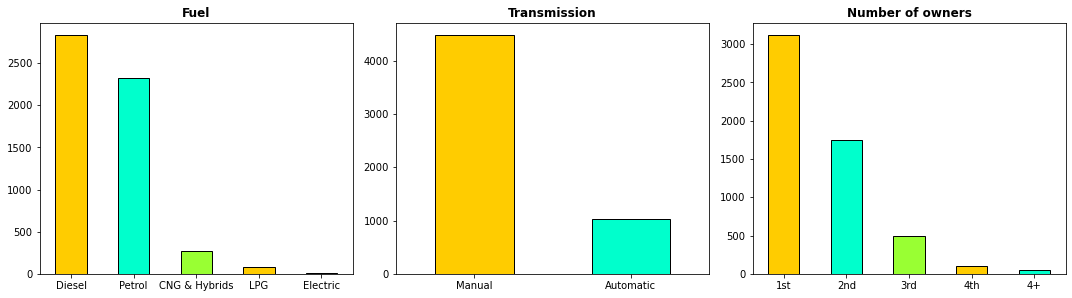

In [19]:
#count plot of features
cat_col = ['Fuel','Transmission', 'Number of owners']
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,8))
for i in cat_col: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#ffcc00','#00ffcc','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
plt.show()

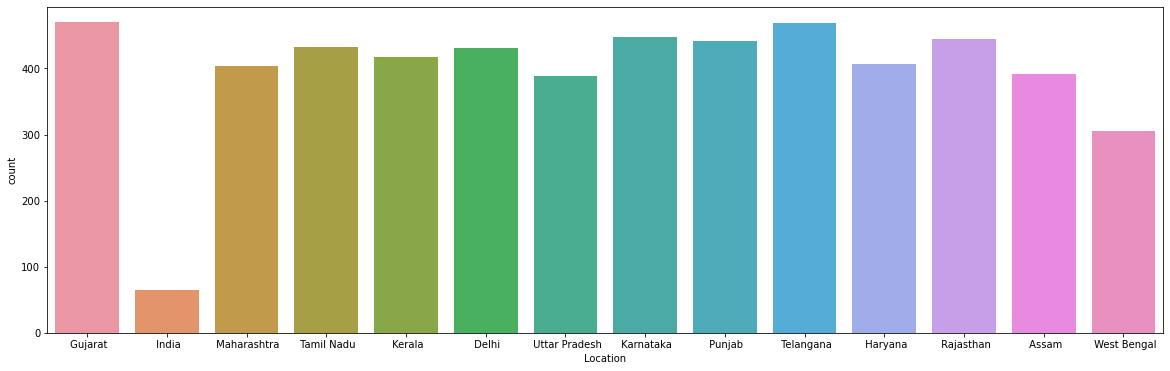

In [20]:
#count plot of the location
plt.figure(figsize=(20,6))
sns.countplot(df.Location)
plt.show()

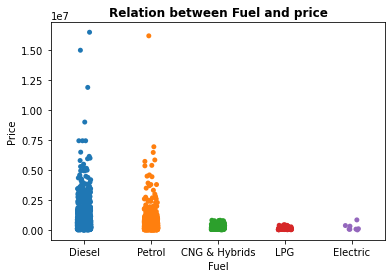

In [21]:
#Relation between fuel Type and price
sns.stripplot(x="Fuel", y="Price",data=df)
plt.title("Relation between Fuel and price",fontweight='bold')
plt.show()

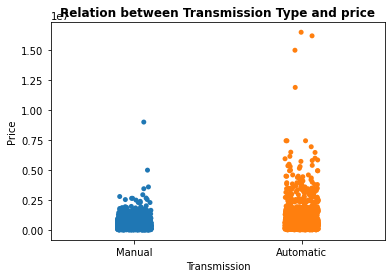

In [22]:
#Relation between Transmission Type and price
sns.stripplot(x="Transmission", y="Price",data=df)
plt.title("Relation between Transmission Type and price",fontweight='bold')
plt.show()

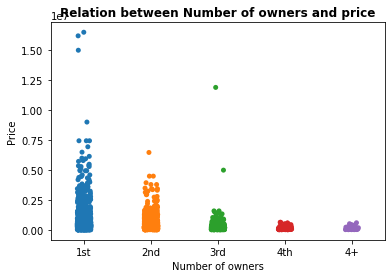

In [23]:
#Relation between owners and price
sns.stripplot(x="Number of owners", y="Price",data=df)
plt.title("Relation between Number of owners and price",fontweight='bold')
plt.show()

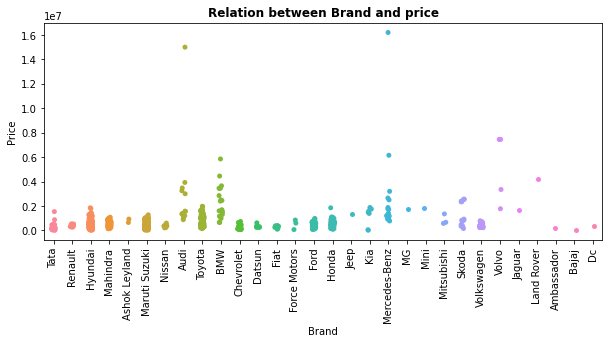

In [24]:
#Relation between Brands and price
plt.figure(figsize=(10,4))
sns.stripplot(x="Brand", y="Price",data=df[0:1000])
plt.title("Relation between Brand and price",fontweight='bold')
plt.xticks(rotation=90)
plt.show()

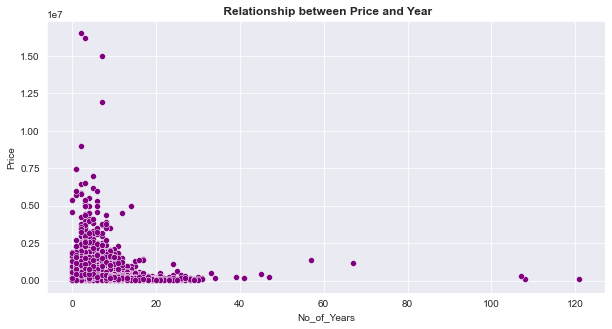

In [25]:
#Scatter Plot of  Relationship between Price and Year
sns.set_style('darkgrid')
plt.figure(figsize=[10,5])
plt.title(" Relationship between Price and Year",fontweight='bold')
sns.scatterplot(x='No_of_Years',y='Price',data=df,color='purple')
plt.show()

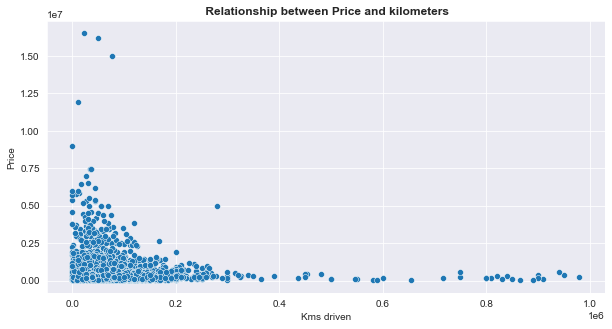

In [26]:
#Scatter Plot of  Relationship between Price and kms
sns.set_style('darkgrid')
plt.figure(figsize=[10,5])
plt.title(" Relationship between Price and kilometers",fontweight='bold')
sns.scatterplot(x='Kms driven',y='Price',data=df)
plt.show()

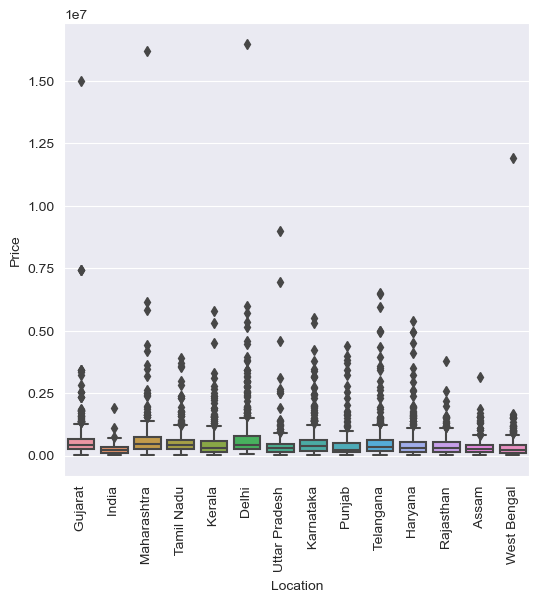

In [27]:
plt.figure(figsize = (6,6), dpi = 100)
sns.boxplot(x = "Location", y = "Price", data = df)
plt.xticks(rotation = 90)
plt.show()

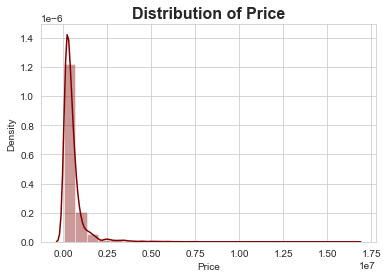

In [28]:
#distribution of price
sns.set_style('whitegrid')
sns.distplot(df['Price'], bins= 25,color='#800000') 
plt.title('Distribution of Price', fontsize=16,fontweight='bold')
plt.xlabel='Price'
plt.ylabel= 'Density'
plt.show()

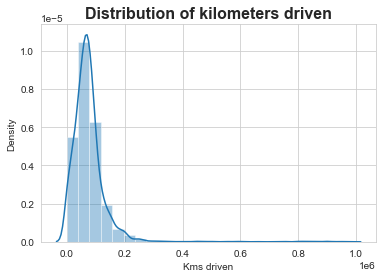

In [29]:
#distribution of kms driven
sns.set_style('whitegrid')
sns.distplot(df['Kms driven'], bins= 25) 
plt.title('Distribution of kilometers driven', fontsize=16,fontweight='bold')
plt.xlabel='Kms driven'
plt.ylabel= 'Density'
plt.show()

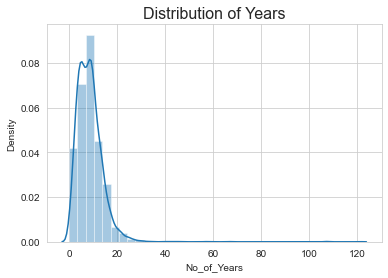

In [30]:
#distribution of number of years
sns.set_style('whitegrid')
sns.distplot(df['No_of_Years'], bins= 35) 
plt.title('Distribution of Years', fontsize=16)
plt.xlabel='Years'
plt.ylabel= 'Density'
plt.show()

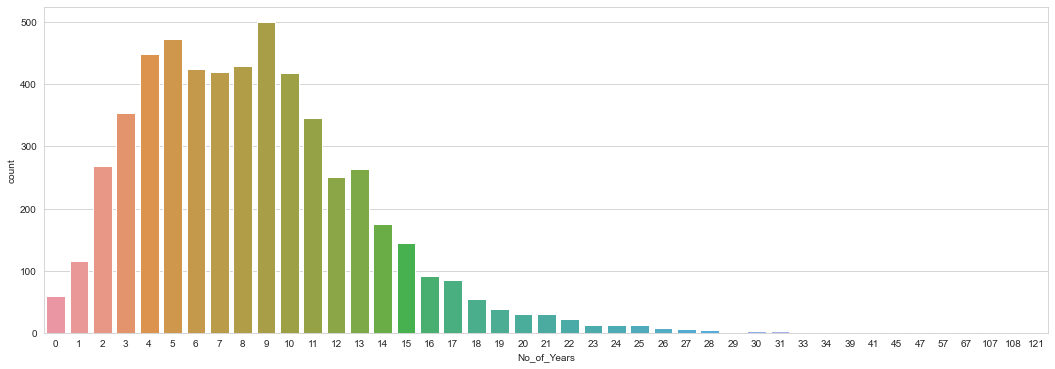

In [31]:
#countplot of age of the car
plt.figure(figsize=(18,6))
sns.countplot(df['No_of_Years'])
plt.show()

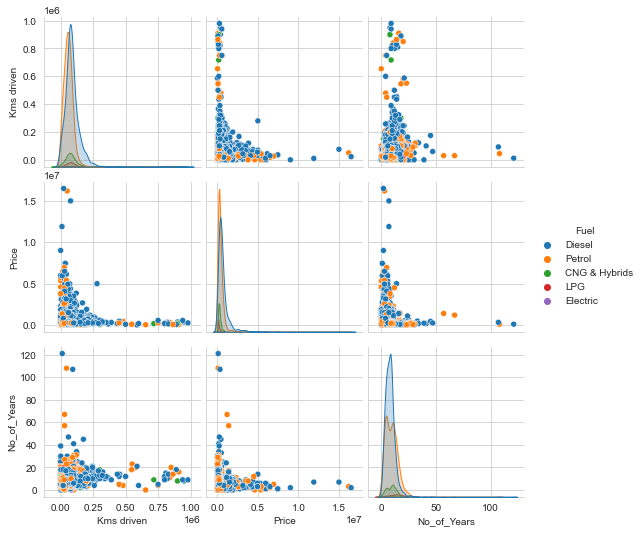

In [32]:
sns.pairplot(data= df, hue= 'Fuel', diag_kind= 'kde')
plt.show()

#### Observations from Visualizations

* From the count plot we can infer the following:
  * For Transmisson type there are 2 unique values 1) Manual and 2) Automatic out of which more than 4000 cars have manual transmission.
  * Most of the cars had diesel and petrol as the fuel type with CNg as third highest and electric as the least.
  * Very few cars were sold 4+ times with 1st owners being the highest.
  *  The highest number of cars were 9 years old.The second highest was 5 years and then 4 years
  * There were very few cars which were 0 years old i.e they were sold within a year of buying a brand new car 
* Relationship between Targe(price) and features:
  * Brands like Audi,BMW and Mercedees Benz had the highest selling prices.
  * BAjaj and DC brands were sold at the minimum prices.
  * Cars which were sold more than 4+ times did not earned high selling prices
  * Cars with Automatic transmission were sold at higher prices as compared to those with manual transmisson.
  * Petrol and diesel cars are sold at higher prices whereas Electric cars had the least selling price among all fuel types.
  *  The cars aged between 0 to 10 years had the highest prices
  * The cars above 25 years had really low prices .
  * Few outliers could be seen for car with 0 years old.
  * when the kms driven was less the prices were high.
  * After 0.6(1e6) kms the prices were almost stable ata 0.13(1e6)
* Distribution plots:
  * Price and kilometers driven shows right skew in their distribution which indicated that the mean is greater then median and mode.

### Outlier detection and treatment

In [33]:
#remove data with 0 kms as it is an unrealistic count
df = df[df['Kms driven'] != 0]
df.shape

(5480, 10)

In [34]:
#check the statistics for kilometers driven
df['Kms driven'].describe()

count      5480.000000
mean      76017.453467
std       66928.226333
min           1.000000
25%       45000.000000
50%       68000.000000
75%       91000.000000
max      980000.000000
Name: Kms driven, dtype: float64

* As we see a large difference between the minimum value and 1st quartile and also the Quartile 3 and maximum value we shall use the flooring and capping method to reduce outliers

In [35]:
#skewness before treating outliers:
print("Skewness of number of years before treating outliers=",df['No_of_Years'].skew())
print("Skewness of kilometeres driven before treating outliers=",df['Kms driven'].skew())

Skewness of number of years before treating outliers= 4.69975355218577
Skewness of kilometeres driven before treating outliers= 6.296485791464635


In [36]:
#removing outliers in kms driven
print(df['Kms driven'].quantile(0.05))
print(df['Kms driven'].quantile(0.99))

9988.35
258071.40000000002


In [37]:
# we shall map any values above the 99th quantile and below 0.05 quantile
df["Kms driven"] = np.where(df["Kms driven"] <9988, 9988,df["Kms driven"])
df["Kms driven"] = np.where(df["Kms driven"] >258071, 258071,df["Kms driven"])

In [38]:
#statistics for number of years
df['No_of_Years'].describe()

count    5480.000000
mean        8.505109
std         5.524702
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max       121.000000
Name: No_of_Years, dtype: float64

In [39]:
#use similar approach for year (flooring and caping)
df['No_of_Years'].quantile(0.99)

24.0

In [40]:
# we shall map any values above the 99th quantile to 24.0
df['No_of_Years'] = np.where(df['No_of_Years'] >24, 24,df['No_of_Years'])

In [41]:
#skewness after treating outliers:
print("Skewness of number of years after treating outliers=",df['No_of_Years'].skew())
print("Skewness of kilometeres driven after treating outliers=",df['Kms driven'].skew())

Skewness of number of years after treating outliers= 0.7686025768632064
Skewness of kilometeres driven after treating outliers= 1.3654028498105992


Thus the skewness is considerably reduced

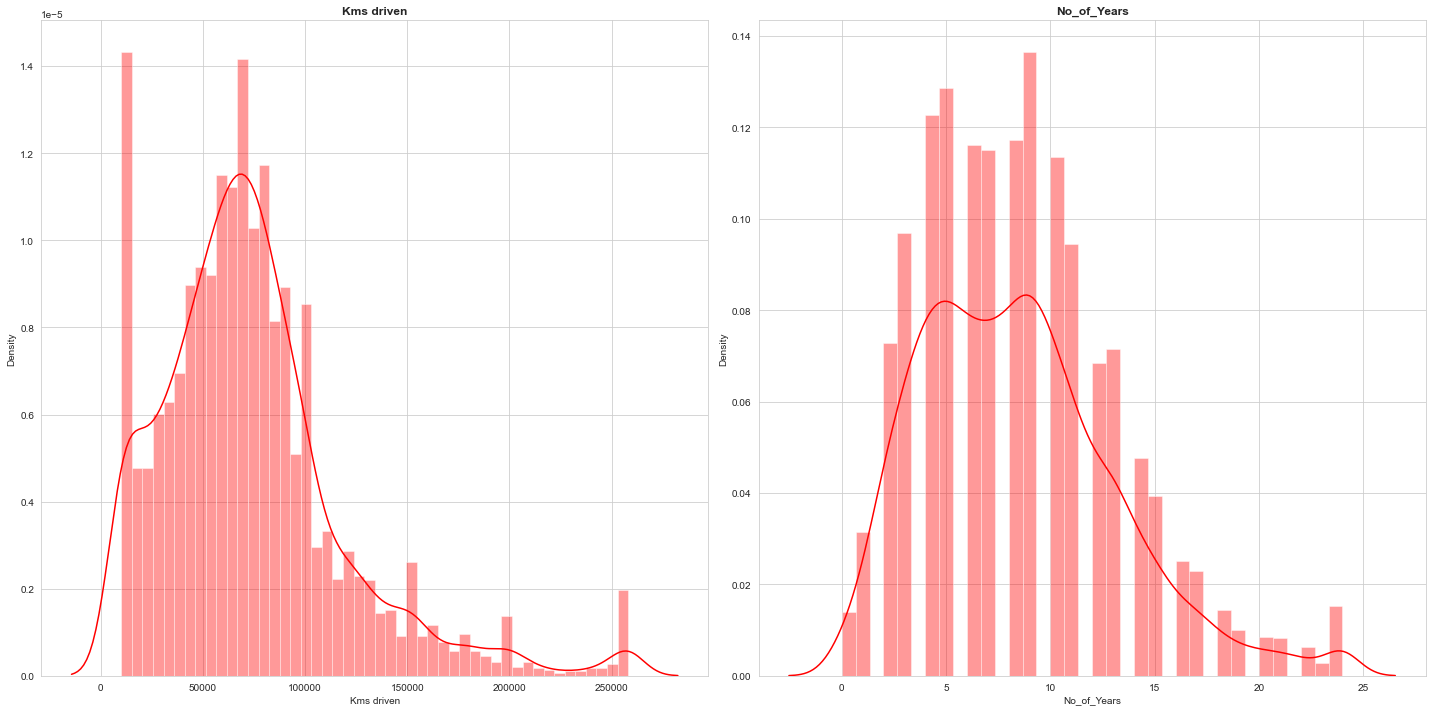

In [42]:
#distribution plot after the treatment of outliers

list1=['Kms driven','No_of_Years']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,10))
for i in list1: 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.distplot(df[i],color='red',kde=True)
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
plt.show()

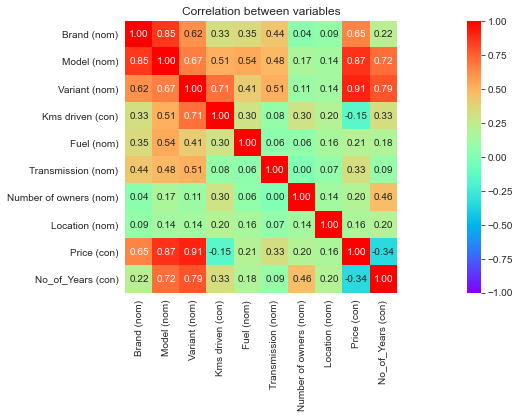

In [43]:
#correlation between variables
from dython import nominal
nominal.associations(df,mark_columns=True,fmt='0.2f',annot=True,figsize=(25,5),
                    title="Correlation between variables",cmap='rainbow')
plt.show()

#### Observations:
   * The highest correlation of target was with 'Variant'=0.91
   * The second highest correlation was 0.87 which was between Model and the price.
   * Brand also had a good correlation with target (0.65)
   * Kilometers driven and age of the car i.e number of years had a negative correlation with cars selling price.
   * This indicates that for higher Kilometers driven the car prices were low.
   * Same goes for Number of years,the older the car the lesser the selling price of car.
   * Other features like number of owners,fuel,transmission and location has moderated positive correlation with target.

In [44]:
#dropping column as it is not providing any information gain
# Though variant has a very high correlation it has above thousand unique values which shall increase the redundancy in model building;
#hence we have chosen to drop variant
df.drop(columns=['Variant','Location'],axis=1,inplace=True) 
df.head(3)

,Brand,Model,Kms driven,Fuel,Transmission,Number of owners,Price,No_of_Years
0,Tata,Tl,9988,Diesel,Manual,1st,80000,13
1,Renault,Duster,90000,Diesel,Manual,1st,451000,5
2,Tata,Safari,125600,Diesel,Manual,2nd,170001,13


In [45]:
#reset the dataframe index as we have dropped multiple things so far
df.reset_index(drop=True, inplace=True)

In [46]:
df.head()

,Brand,Model,Kms driven,Fuel,Transmission,Number of owners,Price,No_of_Years
0,Tata,Tl,9988,Diesel,Manual,1st,80000,13
1,Renault,Duster,90000,Diesel,Manual,1st,451000,5
2,Tata,Safari,125600,Diesel,Manual,2nd,170001,13
3,Hyundai,i20,70330,Diesel,Manual,1st,369000,8
4,Mahindra,Bolero,90000,Diesel,Automatic,2nd,350000,8


#### Standard scailing and Encoding

In [47]:
#one-hot encoding few features
df = pd.get_dummies(df,columns=['Brand','Fuel','Transmission','Number of owners'],drop_first=True )
df.head()

,Model,Kms driven,Price,No_of_Years,Brand_Ashok Leyland,Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_Bajaj,Brand_Bentley,...,Brand_Volvo,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Number of owners_2nd,Number of owners_3rd,Number of owners_4+,Number of owners_4th
0,Tl,9988,80000,13,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,Duster,90000,451000,5,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,Safari,125600,170001,13,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,i20,70330,369000,8,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,Bolero,90000,350000,8,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [48]:
#Label encode Model column has it has too many unique values and may increase the columns manifold if passed through one-hot encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Model']=le.fit_transform(df['Model'])
df.head()

,Model,Kms driven,Price,No_of_Years,Brand_Ashok Leyland,Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_Bajaj,Brand_Bentley,...,Brand_Volvo,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Number of owners_2nd,Number of owners_3rd,Number of owners_4+,Number of owners_4th
0,247,9988,80000,13,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,74,90000,451000,5,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,210,125600,170001,13,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,294,70330,369000,8,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,37,90000,350000,8,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [49]:
#Standard scailing
#we shall scale only the numeric features which shows high skewness
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[['No_of_Years',"Kms driven"]]=sc.fit_transform(df[['No_of_Years',"Kms driven"]])

### Model Building

In [50]:
# assigning features (independent columns) to x
x=df.drop(['Price'],axis=1)
x.head(3)

,Model,Kms driven,No_of_Years,Brand_Ashok Leyland,Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_Bajaj,Brand_Bentley,Brand_Chevrolet,...,Brand_Volvo,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Number of owners_2nd,Number of owners_3rd,Number of owners_4+,Number of owners_4th
0,247,-1.400723,0.972865,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,74,0.360140,-0.721696,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,210,1.143606,0.972865,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [51]:
#assigning target to y
y=df['Price']
y.head(3)

0     80000
1    451000
2    170001
Name: Price, dtype: int64

In [52]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [53]:
#shape of the data 
print("X train shape=",x_train.shape)
print("X test shape=",x_test.shape)
print("Y train shape=",y_train.shape)
print("Y test shape=",y_test.shape)

X train shape= (4110, 57)
X test shape= (1370, 57)
Y train shape= (4110,)
Y test shape= (1370,)


In [54]:
#Import libraries for model building and evaluation

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,GridSearchCV

#### 1)Linear Regressor

In [55]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
lr_pred=Lr.predict(x_test)

#r2 score
lr_r2=r2_score(y_test,lr_pred)*100
print("r2 score=",lr_r2)

#cross validation
cv_lr=cross_val_score(Lr,x,y,cv=7).mean()*100
print("cross validation score is",cv_lr)

#evaluation metrics
lr_mae=mean_absolute_error(y_test,lr_pred)
print("mean absolute error=",lr_mae)
lr_mse=mean_squared_error(y_test,lr_pred)
print("mean squared error=",lr_mse)
lr_rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
print("root mean squared error=",lr_rmse)

r2 score= 49.3585830972395
cross validation score is 41.919709942782724
mean absolute error= 233724.05810395553
mean squared error= 272708564948.65506
root mean squared error= 522215.0562255507


#### 2) Random Forest Regressor

In [56]:
#Hypertuning using Grid Search Cv
rf=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[500,300,700],'criterion':['mse','mae'],
                        'max_features' : ["auto", "sqrt", "log2"]}
clf=GridSearchCV(rf,parameters)
clf.fit(x_train[0:500],y_train[0:500])
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 700}


In [57]:
#implementing the model with obtained hyper-parameters
rf=RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=700)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
#r2 score
rf_r2=r2_score(y_test,lr_pred)*100
print("r2 score=",rf_r2)

#cross validation
cv_rf=cross_val_score(rf,x,y,cv=7).mean()*100
print("cross validation score is",cv_rf)

#evaluation metrics
rf_mae=mean_absolute_error(y_test,rf_pred)
print("mean absolute error=",rf_mae)
rf_mse=mean_squared_error(y_test,rf_pred)
print("mean squared error=",rf_mse)
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))
print("root mean squared error=",rf_rmse)

r2 score= 49.3585830972395
cross validation score is 50.025906453156274
mean absolute error= 145707.16571167056
mean squared error= 232559401583.85355
root mean squared error= 482244.1306888592


### 3) Gradient Boosting Regressor

In [58]:
#Gridsearch cv
gbt = GradientBoostingRegressor()
parameters={'loss':['ls','lad','huber'],'criterion':['mse','mae','friedman_mse'],'n_estimators':[300,400],
                        'max_features' : ["auto", "sqrt", "log2"]}
clf=GridSearchCV(gbt,parameters)
clf.fit(x_train[0:500],y_train[0:500])
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'huber', 'max_features': 'auto', 'n_estimators': 400}


In [59]:
#implementing the model with obtained hyper-parameter

gbt = GradientBoostingRegressor(criterion='mse',loss='huber',max_features='auto',n_estimators=400)
gbt.fit(x_train,y_train)
gb_pred=gbt.predict(x_test)

#r2 score
gb_r2=r2_score(y_test,gb_pred)*100
print("r2 score=",gb_r2)

#cross validation
cv_gb=cross_val_score(gbt,x,y,cv=7).mean()*100
print("cross validation score is",cv_gb)

#evaluation metrics
gb_mae=mean_absolute_error(y_test,gb_pred)
print("mean absolute error=",gb_mae)

gb_mse=mean_squared_error(y_test,gb_pred)
print("mean squared error=",gb_mse)

gb_rmse=np.sqrt(mean_squared_error(y_test,gb_pred))
print("root mean squared error=",gb_rmse)


r2 score= 63.54244259412955
cross validation score is 57.18839222960155
mean absolute error= 144852.69422415644
mean squared error= 196327211396.53152
root mean squared error= 443088.26592060813


#### 4) XGBoost Regressor

In [60]:
xg_reg = XGBRegressor()
parameters={'n_jobs':[4,6,8],'n_estimators':[300,400],'gamma' : [0.5,0.1,0.2,0.4]}
clf=GridSearchCV(xg_reg,parameters)
clf.fit(x_train[0:500],y_train[0:500])
print(clf.best_params_)

{'gamma': 0.1, 'n_estimators': 400, 'n_jobs': 4}


In [61]:
xg_reg = XGBRegressor(gamma=0.1,n_estimators=400,n_jobs=4)
xg_reg.fit(x_train,y_train)
xg_pred=xg_reg.predict(x_test)

#r2 score
xg_r2=r2_score(y_test,xg_pred)*100
print("r2 score=",xg_r2)

#cross validation
cv_xg=cross_val_score(xg_reg,x,y,cv=7).mean()*100
print("cross validation score is",cv_xg)

#evaluation metrics
xg_mae=mean_absolute_error(y_test,xg_pred)
print("mean absolute error=",xg_mae)
xg_mse=mean_squared_error(y_test,xg_pred)
print("mean squared error=",xg_mse)
xg_rmse=np.sqrt(mean_squared_error(y_test,xg_pred))
print("root mean squared error=",xg_rmse)

r2 score= 61.37030920864053
cross validation score is 45.37307540478398
mean absolute error= 142028.5971405252
mean squared error= 208024344191.43723
root mean squared error= 456096.85834418685


#### Comparing all the model performances

In [62]:
#comparison of all the models:
df_n=pd.DataFrame({})
df_n['Model']=['Linear Regression','Random Forest Regression','GradientBoosting Regressor','XGBoost']
df_n['R2_Score']=[lr_r2,rf_r2,gb_r2,xg_r2]
df_n['CV_Score']=[cv_lr,cv_rf,cv_gb,cv_xg]
df_n['MAE']=[lr_mae,rf_mae,gb_mae,xg_mae]
df_n['MSE']=[lr_mse,rf_mse,gb_mse,xg_mse]
df_n['RMSE']=[lr_rmse,rf_rmse,gb_rmse,xg_rmse]
df_n.sort_values(by=['RMSE'])

,Model,R2_Score,CV_Score,MAE,MSE,RMSE
2,GradientBoosting Regressor,63.542443,57.188392,144852.694224,1.963272e+11,443088.265921
3,XGBoost,61.370309,45.373075,142028.597141,2.080243e+11,456096.858344
1,Random Forest Regression,49.358583,50.025906,145707.165712,2.325594e+11,482244.130689
0,Linear Regression,49.358583,41.919710,233724.058104,2.727086e+11,522215.056226


#### Observations
* Thus the best performing model is Gradient Boosting Regressor with r2 score of 63.5 and rmse=443088.
* We obtain high rmses here as the distribution of prices is not normal and there are many outliers also

In [64]:
# comparing the predictions and actual values
df_comp = pd.DataFrame((gb_pred), columns=['Predicted Price'])

#  Actual price
y_test = y_test.reset_index(drop=True)
df_comp['Actual Price'] = (y_test)

# difference between the targets and the predictions
df_comp['Residual'] = df_comp['Actual Price'] - df_comp['Predicted Price']

df_comp['Difference%'] = np.abs(df_comp['Residual']/df_comp['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_comp.head(5)

,Predicted Price,Actual Price,Residual,Difference%
0,597653.12,635000,37346.88,5.88
1,697405.35,750000,52594.65,7.01
2,159191.20,150000,-9191.20,6.13
3,142565.16,220000,77434.84,35.20
4,1063228.65,1495000,431771.35,28.88


#### Visualizations for Gradient Boosting

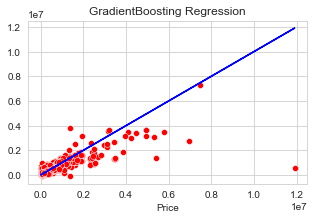

In [65]:
### Best fit line
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test,y=gb_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("GradientBoosting Regression")
plt.show()


Text(0.5, 1.0, 'True value Vs Predicted values of Car Price')

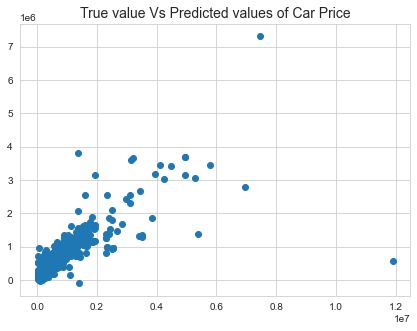

In [66]:
#scatter plot of true v/s predicted values
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= gb_pred)
plt.title('True value Vs Predicted values of Car Price', fontsize=14)

Residuals
Next, I explore the residuals to make sure everything was okay with the data (i.e. it is Normally distributed).

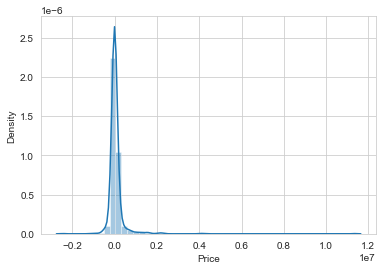

In [67]:
#residuals
sns.distplot(y_test - gb_pred)
plt.show()

#### Save the gradient Boosting model

In [68]:
#save the model
import pickle
filename="Car-price.pkl"
pickle.dump(gbt,open(filename,'wb'))

#### Thank-You